In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris() # 품종 : 3개
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0, verbose=1)
kmeans.fit(irisDF) # labels, centers 생성

Initialization complete
Iteration 0, inertia 97.65.
Iteration 1, inertia 82.25856145640076.
Iteration 2, inertia 81.32806489357331.
Iteration 3, inertia 80.0594266200554.
Iteration 4, inertia 79.57585726935403.
Iteration 5, inertia 78.9974989564323.
Iteration 6, inertia 78.8556658259773.
Converged at iteration 6: strict convergence.


c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3, random_state=0, verbose=1)

In [8]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
import numpy as np
import plotly.graph_objects as go

# 원래의 벡터 정의
v1 = np.array([1, 0])
v2 = np.array([0, 1])

# 애니메이션 프레임을 위한 회전 각도 정의
theta_values = np.linspace(0, 2 * np.pi, 100)  # 0에서 360도까지 100단계

# Plotly 그래프 생성
fig = go.Figure()

# 모든 프레임을 위한 데이터 설정
frames = []
for theta in theta_values:
    # 회전 행렬 정의
    A = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    
    # 선형 변환 적용
    v1_transformed = A @ v1
    v2_transformed = A @ v2
    
    # 각 프레임 추가
    frames.append(go.Frame(data=[
        go.Scatter(x=[0, v1_transformed[0]], y=[0, v1_transformed[1]], 
                   mode='lines+markers', marker=dict(size=5, color='blue'), 
                   line=dict(width=3, color='blue')),
        
        go.Scatter(x=[0, v2_transformed[0]], y=[0, v2_transformed[1]], 
                   mode='lines+markers', marker=dict(size=5, color='orange'), 
                   line=dict(width=3, color='orange'))
    ]))

# 초기 상태 (원래 벡터들) 설정
fig.add_trace(go.Scatter(x=[0, v1[0]], y=[0, v1[1]], 
                         mode='lines+markers', 
                         marker=dict(size=5, color='red'), 
                         line=dict(width=3, color='red'), 
                         name='v1 (1, 0)'))

fig.add_trace(go.Scatter(x=[0, v2[0]], y=[0, v2[1]], 
                         mode='lines+markers', 
                         marker=dict(size=5, color='green'), 
                         line=dict(width=3, color='green'), 
                         name='v2 (0, 1)'))

# 레이아웃 및 애니메이션 설정
fig.update_layout(
    xaxis=dict(range=[-2, 2], zeroline=True),
    yaxis=dict(range=[-2, 2], zeroline=True),
    title="2D 선형 변환 애니메이션 (Plotly)",
    showlegend=True,
    width=700,
    height=700,
    plot_bgcolor='white',
    updatemenus=[dict(type="buttons", showactive=False,
                      buttons=[dict(label="Play", method="animate", 
                                    args=[None, dict(frame=dict(duration=50, redraw=True), 
                                                     fromcurrent=True, mode='immediate')]),
                               dict(label="Pause", method="animate", args=[[None], dict(frame=dict(duration=0, redraw=False), mode='immediate')])])])

# 프레임 추가
fig.frames = frames

# 그리드와 축 설정
fig.update_xaxes(showgrid=True, zeroline=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, zeroline=True, gridwidth=1, gridcolor='lightgray')

# 그래프 출력
fig.show()

In [6]:
import numpy as np
import plotly.graph_objects as go

# 원래의 벡터들 정의 (3차원)
v1 = np.array([9, 1, 5])  # x축 방향의 벡터
v2 = np.array([1, 4, 10])  # y축 방향의 벡터
v3 = np.array([2, 7, 1])  # z축 방향의 벡터

# 애니메이션 프레임을 위한 회전 각도 정의
theta_values = np.linspace(0, 2 * np.pi, 100)  # 0에서 360도까지 100단계

# 회전축: z축을 기준으로 회전
axis = np.array([0, 0, 1])

# Plotly 그래프 생성
fig = go.Figure()

# 모든 프레임을 위한 데이터 설정
frames = []
for theta in theta_values:
    # 회전 행렬 생성 (z축을 기준으로 회전)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

    # 각 벡터에 회전 변환 적용
    v1_transformed = R @ v1
    v2_transformed = R @ v2
    v3_transformed = R @ v3
    
    # 각 프레임 추가
    frames.append(go.Frame(data=[
        go.Scatter3d(x=[0, v1_transformed[0]], y=[0, v1_transformed[1]], z=[0, v1_transformed[2]], 
                     mode='lines+markers', marker=dict(size=5, color='blue'), 
                     line=dict(width=5, color='blue')),
        
        go.Scatter3d(x=[0, v2_transformed[0]], y=[0, v2_transformed[1]], z=[0, v2_transformed[2]], 
                     mode='lines+markers', marker=dict(size=5, color='green'), 
                     line=dict(width=5, color='green')),

        go.Scatter3d(x=[0, v3_transformed[0]], y=[0, v3_transformed[1]], z=[0, v3_transformed[2]], 
                     mode='lines+markers', marker=dict(size=5, color='red'), 
                     line=dict(width=5, color='red'))
    ]))

# 초기 상태 (원래 벡터들) 설정
fig.add_trace(go.Scatter3d(x=[0, v1[0]], y=[0, v1[1]], z=[0, v1[2]], 
                           mode='lines+markers', 
                           marker=dict(size=5, color='blue'), 
                           line=dict(width=5, color='blue'), 
                           name='v1 (1, 0, 0)'))

fig.add_trace(go.Scatter3d(x=[0, v2[0]], y=[0, v2[1]], z=[0, v2[2]], 
                           mode='lines+markers', 
                           marker=dict(size=5, color='green'), 
                           line=dict(width=5, color='green'), 
                           name='v2 (0, 1, 0)'))

fig.add_trace(go.Scatter3d(x=[0, v3[0]], y=[0, v3[1]], z=[0, v3[2]], 
                           mode='lines+markers', 
                           marker=dict(size=5, color='red'), 
                           line=dict(width=5, color='red'), 
                           name='v3 (0, 0, 1)'))

# 레이아웃 및 애니메이션 설정
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-2, 2], zeroline=True),
        yaxis=dict(range=[-2, 2], zeroline=True),
        zaxis=dict(range=[-2, 2], zeroline=True)
    ),
    title="3D 선형 변환 애니메이션 (Plotly)",
    showlegend=True,
    width=700,
    height=700,
    plot_bgcolor='white',
    updatemenus=[dict(type="buttons", showactive=False,
                      buttons=[dict(label="Play", method="animate", 
                                    args=[None, dict(frame=dict(duration=50, redraw=True), 
                                                     fromcurrent=True, mode='immediate')]),
                               dict(label="Pause", method="animate", 
                                    args=[[None], dict(frame=dict(duration=0, redraw=False), 
                                                       mode='immediate')])])])

# 프레임 추가
fig.frames = frames

# 그래프 출력
fig.show()

In [9]:
# 데이터포인트 : 150개 => 데이터포인트별로 레이블 부여(0, 1, 2), 품종은 아니다
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
# 원래답과 위 레이블의 정확도를 확인
# irisDF에 원래답 추가
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# 데이터프레임에 레이블을 추가
irisDF['cluster'] = kmeans.labels_
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [13]:
# 그룹핑
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


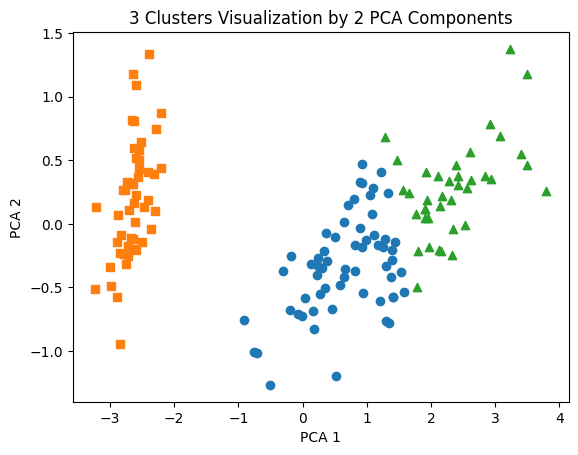

In [18]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스(행)로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [26]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.857950,4.326169,2
1,0.419611,4.553946,0
2,1.224186,4.908847,0


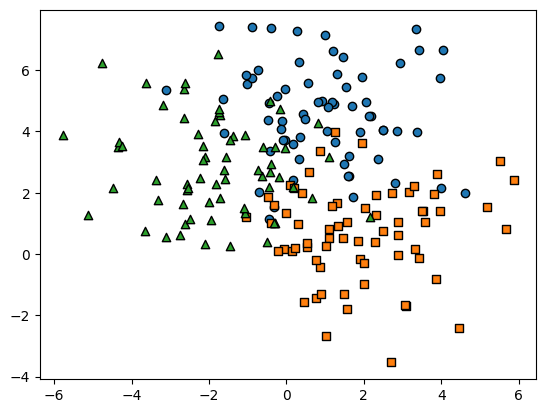

In [27]:
target_list = np.unique(y) # [0, 1, 2]
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



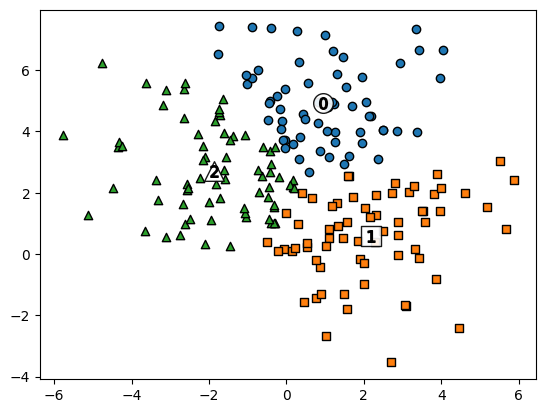

In [28]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [29]:
# clustering
# target : 원래답
# kmeans_label : 군집화한 결과 값
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               53
        2                8
        1                6
1       1               57
        2                6
        0                4
2       2               57
        0                6
        1                3
Name: count, dtype: int64


In [30]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_ # 데이터포인트(150개)별 군집 결과

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.551


c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [31]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64

In [38]:
# cluster == 0
irisDF[irisDF['silhouette_coeff'] < 0.3].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 50 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length      21 non-null     float64
 1   sepal_width       21 non-null     float64
 2   petal_length      21 non-null     float64
 3   petal_width       21 non-null     float64
 4   cluster           21 non-null     int32  
 5   silhouette_coeff  21 non-null     float64
dtypes: float64(5), int32(1)
memory usage: 1.1 KB


In [39]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Wi

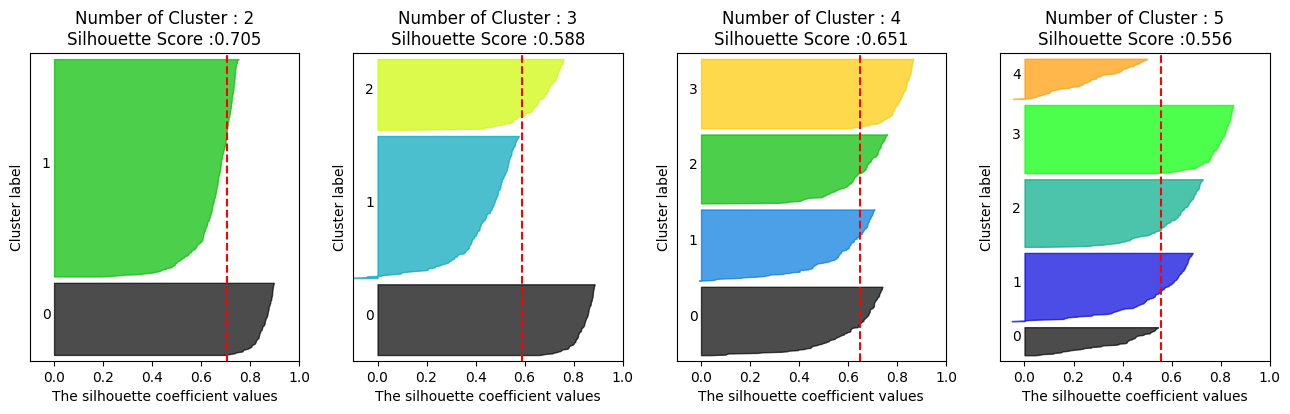

In [40]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Wi

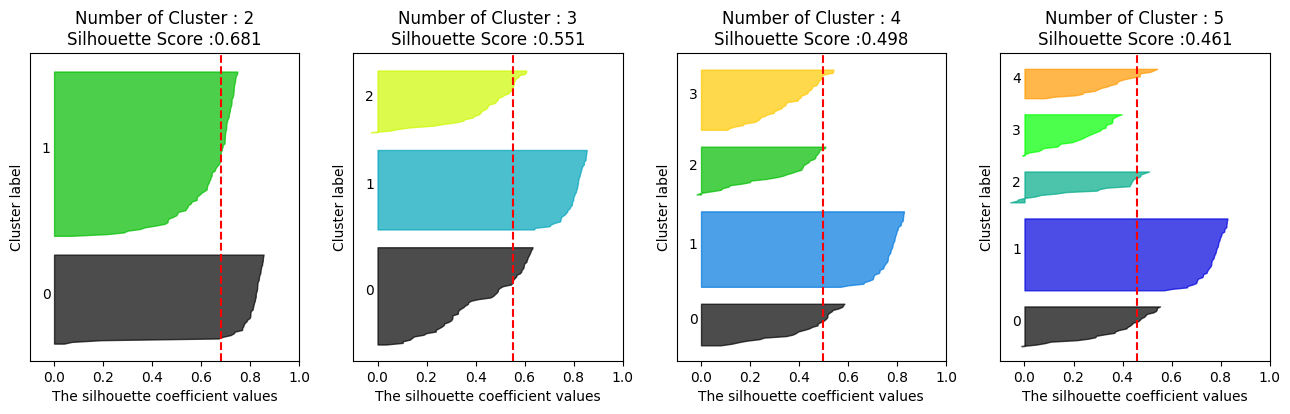

In [41]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

In [42]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [43]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

In [45]:
clusterDF = pd.DataFrame(
    data=X, # X 원 데이터
    columns=['ftr1', 'ftr2']
)
clusterDF.head()

,ftr1,ftr2
0,0.519859,4.862295
1,1.692469,0.205982
2,1.356789,4.364625
3,-1.569869,3.015029
4,-1.636675,2.375864


In [46]:
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,0.519859,4.862295,0
1,1.692469,0.205982,1
2,1.356789,4.364625,0
3,-1.569869,3.015029,2
4,-1.636675,2.375864,2


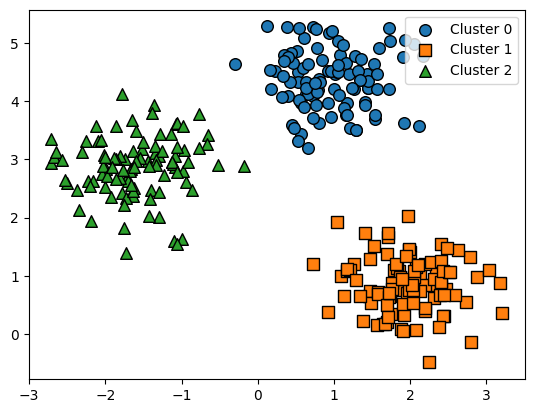

In [47]:
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

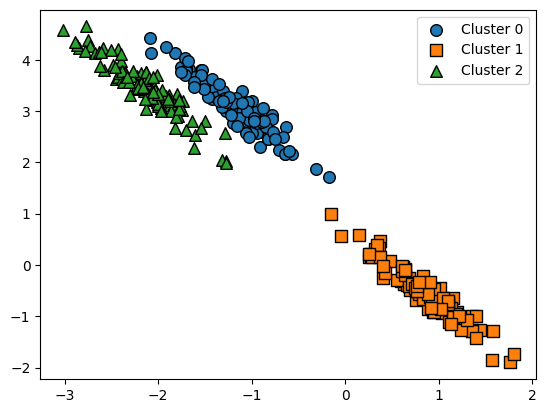

In [48]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation) # 내적 => 변환
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



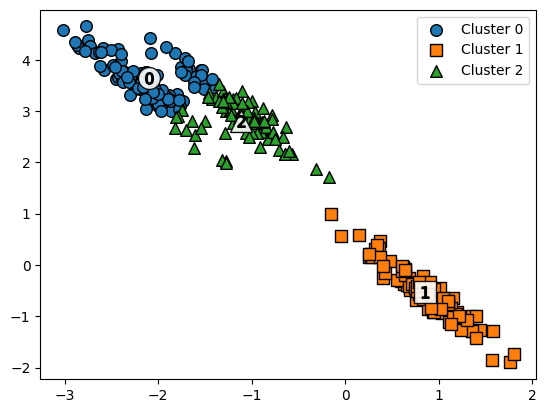

In [49]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

c:\ProgramData\anaconda3\envs\ml-dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



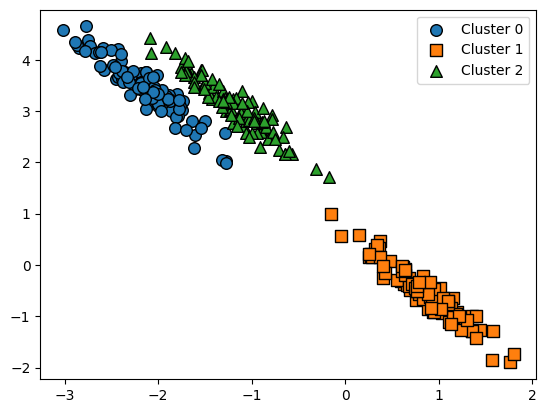

In [51]:
from sklearn.mixture import GaussianMixture
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [52]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


In [53]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [64]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


In [65]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

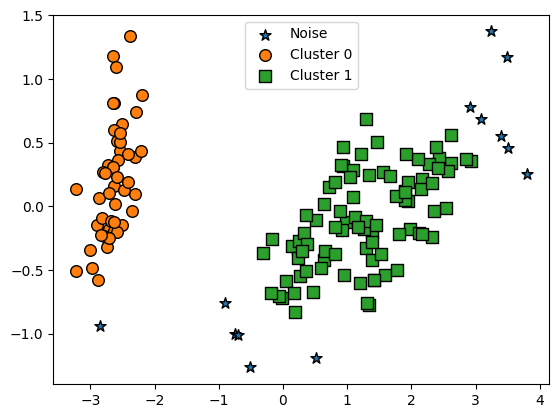

In [66]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


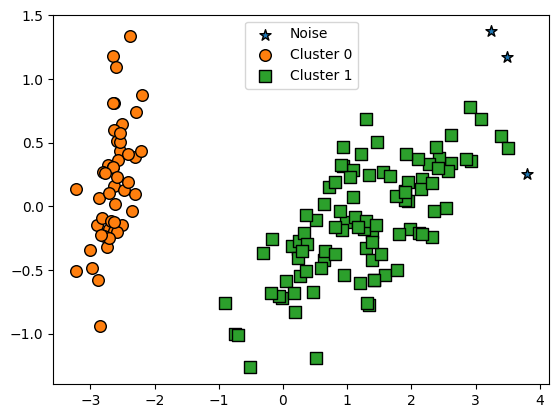

In [67]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)



In [69]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


In [72]:
irisDF[irisDF['dbscan_cluster'] == -1].head()

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster,ftr1,ftr2
117,7.7,3.8,6.7,2.2,2,-1,3.487055,1.175739
118,7.7,2.6,6.9,2.3,2,-1,3.795645,0.257323
131,7.9,3.8,6.4,2.0,2,-1,3.230674,1.374165


In [73]:
irisDF[irisDF['dbscan_cluster'] == -1].index

Index([117, 118, 131], dtype='int64')

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


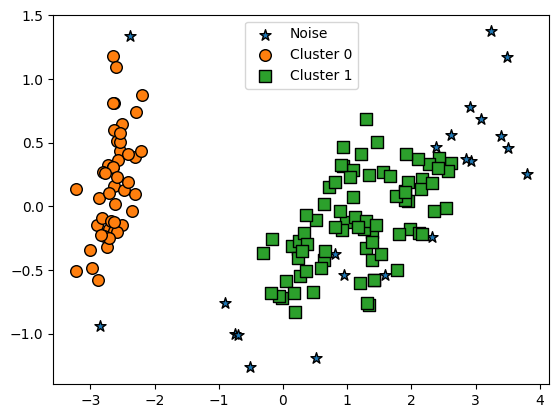

In [74]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)